# H He Mixture Simulation

## Dynamic Structure Function and Current Autocorrelation Function


In [1]:
# Import the usual libraries
%pylab
%matplotlib inline
import os
import seaborn as sns

from matplotlib.colors import LogNorm
# Import sarkas
from sarkas.processes import Simulation, PostProcess, PreProcess
from sarkas.tools.transport import TransportCoefficient

sns.set_context("talk")

# Create the file path to the YAML input file
input_file_name = os.path.join('tutorial_yaml_files', 'BIM_cgs.yaml')

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
# sim = Simulation(input_file_name)
# sim.setup(read_yaml=True)
# sim.run()







________             ______                
__  ___/_____ __________  /_______ ________
_____ \_  __ `/_  ___/_  //_/  __ `/_  ___/
____/ // /_/ /_  /   _  ,<  / /_/ /_(__  ) 
/____/ \__,_/ /_/    /_/|_| \__,_/ /____/  
                                           


An open-source pure-python molecular dynamics code for non-ideal plasmas.


  0%|          | 0/2500 [00:00<?, ?it/s]



----------------- Simulation -----------------------

Job ID:  bim
Job directory:  Simulations/bim
Equilibration dumps directory:  Simulations/bim/Equilibration/dumps
Production dumps directory:  Simulations/bim/Production/dumps

Units:  cgs
Total No. of particles =  2500

Particle Species:
No. of species =  2
Species 1 : H
	Species ID: 0
	No. of particles = 625 
	Number density = 4.050000e+27 [N/cc]
	Mass = 1.672622e-24 [g]
	Charge = 4.803205e-10 [esu]
	Temperature = 1.678013e+05 [K]
Species 2 : He
	Species ID: 1
	No. of particles = 1875 
	Number density = 1.215000e+28 [N/cc]
	Mass = 6.690488e-24 [g]
	Charge = 9.606409e-10 [esu]
	Temperature = 1.678013e+05 [K]

Lengths scales:
Wigner-Seitz radius = 2.451689e-10 [cm]
No. of non-zero box dimensions =  3
Box length along x axis = 2.187810e+01 a_ws = 5.363830e-09 [cm]
Box length along y axis = 2.187810e+01 a_ws = 5.363830e-09 [cm]
Box length along z axis = 2.187810e+01 a_ws = 5.363830e-09 [cm]
The remaining lengths scales are given in [

  0%|          | 2/10000 [00:00<10:35, 15.74it/s]


Equilibration Time: 0 hrs 2 min 30 sec

------------- Production -------------


100%|██████████| 10000/10000 [10:46<00:00, 15.47it/s]


Production Time: 0 hrs 10 min 46 sec

Total Time: 0 hrs 13 min 18 sec


In [9]:
# postproc = PostProcess(input_file_name)
# postproc.setup(read_yaml=True)

# postproc.ccf.setup(postproc.parameters)
# postproc.ccf.parse()

# postproc.dsf.setup(postproc.parameters)
# postproc.dsf.parse()

postproc.ec.setup(postproc.parameters)
postproc.ec.compute()

Parsing particles' velocities.



Calculating Electric current quantities.


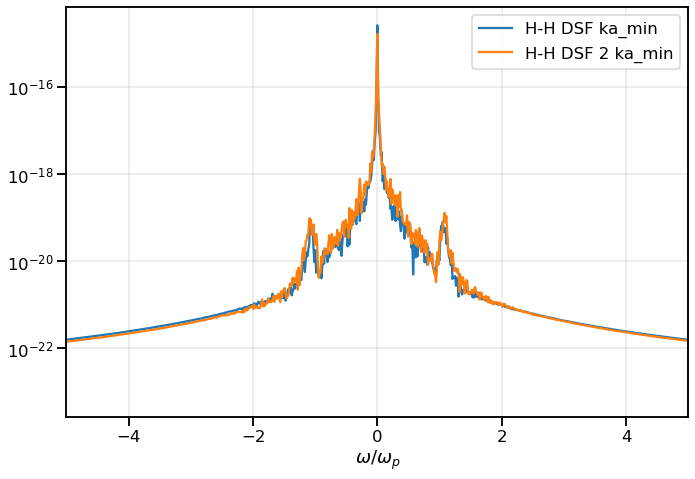

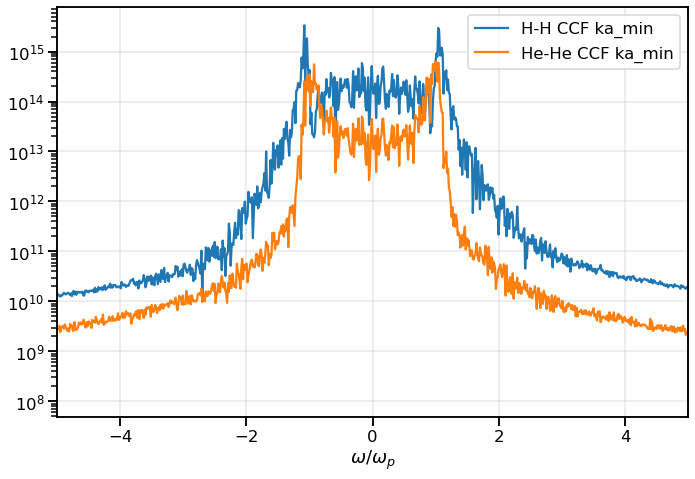

In [20]:
fig, ax = plt.subplots(1,1, figsize=(10, 7))
postproc.dsf.plot(normalization=postproc.dsf.total_plasma_frequency,
                  y = ['H-H DSF ka_min', 'H-H DSF 2 ka_min'], 
                  logy = True, 
                  xlim = (-5, 5),
                  xlabel = r'$\omega/\omega_p$', 
                  ax = ax)
ax.grid(True, alpha = 0.3)
fig, ax = plt.subplots(1,1, figsize=(10, 7))
postproc.ccf.plot(normalization=postproc.ccf.total_plasma_frequency,
                  y = ['H-H CCF ka_min', 'He-He CCF ka_min'], 
                  logy = True,
                  xlim = (-5, 5),
                  xlabel = r'$\omega/\omega_p$', 
                  ax = ax)
ax.grid(True, alpha = 0.3)

AttributeError: 'DynamicStructureFactor' object has no attribute 'no_ka_values'

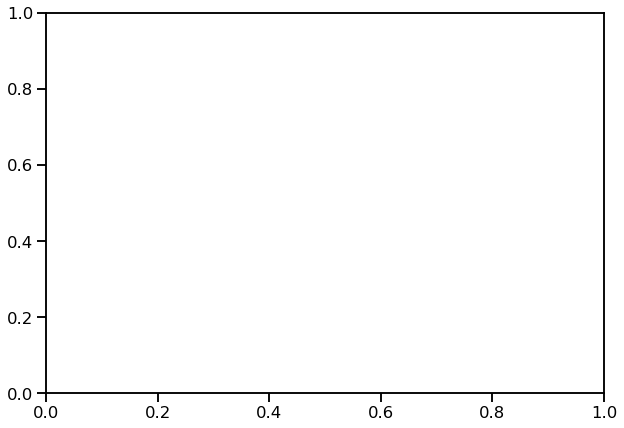

In [5]:

fig, ax = plt.subplots(1,1, figsize=(10, 7))
# postproc.ccf.plot(normalization=postproc.ccf.total_plasma_frequency,
#                   y = ['H-H CCF ka_min', 'H-H CCF 2 ka_min', 'H-H CCF 5 ka_min', 'H-H CCF 7 ka_min'], 
#                   logy = True,
#                   xlim = (-5, 5),
#                   xlabel = r'$\omega/\omega_p$', 
#                   ax = ax)
# ax.grid(True, alpha = 0.3)
frequencies = np.array(postproc.dsf.dataframe["Frequencies"])
ka_mesh, w_mesh = np.meshgrid(postproc.ccf.ka_values, frequencies/postproc.ccf.total_plasma_frequency)

ax.pcolormesh(ka_mesh, w_mesh, 
              postproc.ccf.dataframe_longitudinal.iloc[:,int(2*postproc.dsf.no_ka_values + 1):],
              shading='auto', cmap = 'cividis', norm = LogNorm( vmin = 1e14, vmax = 1e20))
ax.set_ylim(-2, 2)
ax.set_xlabel(r'$ka$')
ax.set_ylabel(r'$\omega/\omega_p$')